In [2]:
import pandas as pd

# Load the dataset
file_path_train = "/content/drive/MyDrive/Colab Notebooks/train.csv"
file_path_test = "/content/drive/MyDrive/Colab Notebooks/test.csv"
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

# **No. 1**
Lakukan eksplorasi terhadap dataset, serta terapkan preprocessing yang diperlukan dan tentukan fitur paling berpengaruh terhadap waktu pengiriman. Jelaskan alasan dibalik pemilihan fitur tersebut.

In [3]:
# data cleaning untuk train

from sklearn.impute import SimpleImputer

# Drop sensitive columns
df_cleaned_train = df_train.drop(columns=['Nama_Penerima', 'Alamat_Penerima', 'No_Telp_Penerima'])

# Identify categorical and numerical columns
categorical_cols = df_cleaned_train.select_dtypes(include='object').columns.tolist()
numerical_cols = df_cleaned_train.select_dtypes(exclude='object').columns.tolist()

# Impute missing values
# For categorical columns: use mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned_train[categorical_cols] = cat_imputer.fit_transform(df_cleaned_train[categorical_cols])

# For numerical columns: use median
num_imputer = SimpleImputer(strategy='median')
df_cleaned_train[numerical_cols] = num_imputer.fit_transform(df_cleaned_train[numerical_cols])

df_cleaned_train.isnull().sum()


,0
ID_Pesanan,0
Jenis_Kelamin,0
Jarak_km,0
Cuaca,0
Tingkat_Kemacetan,0
Waktu,0
Tipe_Kendaraan,0
Waktu_Persiapan_menit,0
Metode_Pembayaran,0
Tahun_Masuk,0


In [4]:
# data cleaning untuk test

# Drop sensitive columns
df_cleaned_test = df_test.drop(columns=['Nama_Penerima', 'Alamat_Penerima', 'No_Telp_Penerima'])

# Identify categorical and numerical columns
categorical_cols = df_cleaned_test.select_dtypes(include='object').columns.tolist()
numerical_cols = df_cleaned_test.select_dtypes(exclude='object').columns.tolist()

# Impute missing values
# For categorical columns: use mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned_test[categorical_cols] = cat_imputer.fit_transform(df_cleaned_test[categorical_cols])

# For numerical columns: use median
num_imputer = SimpleImputer(strategy='median')
df_cleaned_test[numerical_cols] = num_imputer.fit_transform(df_cleaned_test[numerical_cols])


df_cleaned_test.isnull().sum()

,0
ID_Pesanan,0
Jenis_Kelamin,0
Jarak_km,0
Cuaca,0
Tingkat_Kemacetan,0
Waktu,0
Tipe_Kendaraan,0
Waktu_Persiapan_menit,0
Metode_Pembayaran,0
Tahun_Masuk,0


In [5]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 11.7 MB/s eta 0:00:00


In [6]:
# encoding untuk data train

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import numpy as np

# Label encoding
label_cols = ['Cuaca', 'Tingkat_Kemacetan', 'Waktu', 'Tipe_Kendaraan']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df_cleaned_train[col] = label_encoders[col].fit_transform(df_cleaned_train[col])

# One hot encoding
df_cleaned_train = pd.get_dummies(df_cleaned_train, columns=['Jenis_Kelamin', 'Metode_Pembayaran', 'Menggunakan_Voucher', 'Status'])

df_cleaned_train

,ID_Pesanan,Jarak_km,Cuaca,Tingkat_Kemacetan,Waktu,Tipe_Kendaraan,Waktu_Persiapan_menit,Tahun_Masuk,Total_Pesanan,Harga_Makanan,Biaya_Pengiriman,Waktu_Pengiriman_menit,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Metode_Pembayaran_Non-Tunai,Metode_Pembayaran_Tunai,Menggunakan_Voucher_Iya,Menggunakan_Voucher_Tidak,Status_Selesai
0,667.0,5.30,3,0,3,1,16.0,2020.0,3.0,50000.0,9000.0,32.0,False,True,True,False,False,True,True
1,130.0,10.46,3,0,3,1,25.0,2022.0,3.0,50000.0,7000.0,68.0,False,True,True,False,False,True,True
2,785.0,4.04,4,2,3,1,14.0,2019.0,5.0,50000.0,7000.0,39.0,False,True,True,False,False,True,True
3,153.0,3.33,3,1,3,2,24.0,2023.0,1.0,50000.0,10000.0,44.0,False,True,True,False,True,False,True
4,921.0,17.44,3,0,0,0,23.0,2025.0,1.0,50000.0,7500.0,85.0,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,98.0,8.84,3,0,1,1,26.0,2025.0,3.0,50000.0,5500.0,57.0,False,True,False,True,True,False,True
696,181.0,7.15,0,0,1,1,15.0,2022.0,4.0,50000.0,9000.0,42.0,True,False,True,False,False,True,True
697,429.0,7.34,4,0,3,1,22.0,2017.0,5.0,50000.0,6500.0,47.0,False,True,True,False,False,True,True
698,818.0,8.28,2,0,3,0,29.0,2018.0,1.0,50000.0,5000.0,58.0,True,False,True,False,True,False,True


In [7]:
# handling outlier untuk data train

from feature_engine.outliers import Winsorizer

scaled_columns = df_cleaned_train.select_dtypes(include=[np.number]).columns.drop('ID_Pesanan')

# Winsorizer for outlier treatment
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                        variables=[col for col in scaled_columns.tolist() if col != 'Harga_Makanan']) # Excluding 'Harga_Makanan'
df_processed_train = winsorizer.fit_transform(df_cleaned_train)

df_processed_train


,ID_Pesanan,Jarak_km,Cuaca,Tingkat_Kemacetan,Waktu,Tipe_Kendaraan,Waktu_Persiapan_menit,Tahun_Masuk,Total_Pesanan,Harga_Makanan,Biaya_Pengiriman,Waktu_Pengiriman_menit,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Metode_Pembayaran_Non-Tunai,Metode_Pembayaran_Tunai,Menggunakan_Voucher_Iya,Menggunakan_Voucher_Tidak,Status_Selesai
0,667.0,5.30,3.0,0,3,1,16.0,2020.0,3.0,50000.0,9000.0,32.0,False,True,True,False,False,True,True
1,130.0,10.46,3.0,0,3,1,25.0,2022.0,3.0,50000.0,7000.0,68.0,False,True,True,False,False,True,True
2,785.0,4.04,4.0,2,3,1,14.0,2019.0,5.0,50000.0,7000.0,39.0,False,True,True,False,False,True,True
3,153.0,3.33,3.0,1,3,2,24.0,2023.0,1.0,50000.0,10000.0,44.0,False,True,True,False,True,False,True
4,921.0,17.44,3.0,0,0,0,23.0,2025.0,1.0,50000.0,7500.0,85.0,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,98.0,8.84,3.0,0,1,1,26.0,2025.0,3.0,50000.0,5500.0,57.0,False,True,False,True,True,False,True
696,181.0,7.15,0.5,0,1,1,15.0,2022.0,4.0,50000.0,9000.0,42.0,True,False,True,False,False,True,True
697,429.0,7.34,4.0,0,3,1,22.0,2017.0,5.0,50000.0,6500.0,47.0,False,True,True,False,False,True,True
698,818.0,8.28,2.0,0,3,0,29.0,2018.0,1.0,50000.0,5000.0,58.0,True,False,True,False,True,False,True


In [8]:
# encoding data untuk data test

# Label encoding
label_cols = ['Cuaca', 'Tingkat_Kemacetan', 'Waktu', 'Tipe_Kendaraan']
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df_cleaned_test[col] = label_encoders[col].fit_transform(df_cleaned_test[col])

# One hot encoding
df_cleaned_test = pd.get_dummies(df_cleaned_test, columns=['Jenis_Kelamin', 'Metode_Pembayaran', 'Menggunakan_Voucher', 'Status'])

In [9]:
# handling outlier untuk data test

from feature_engine.outliers import Winsorizer

scaled_columns = df_cleaned_test.select_dtypes(include=[np.number]).columns.drop('ID_Pesanan')

# Winsorizer for outlier treatment
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                        variables=[col for col in scaled_columns.tolist() if col != 'Harga_Makanan']) # Excluding 'Harga_Makanan'
df_processed_test = winsorizer.fit_transform(df_cleaned_test)

df_processed_test

,ID_Pesanan,Jarak_km,Cuaca,Tingkat_Kemacetan,Waktu,Tipe_Kendaraan,Waktu_Persiapan_menit,Tahun_Masuk,Total_Pesanan,Harga_Makanan,Biaya_Pengiriman,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Metode_Pembayaran_Non-Tunai,Metode_Pembayaran_Tunai,Menggunakan_Voucher_Iya,Menggunakan_Voucher_Tidak,Status_Selesai
0,989.0,5.30,3.0,1,2,2,29.0,2022.0,5.0,50000.0,5500.0,False,True,True,False,False,True,True
1,174.0,4.92,3.0,2,1,2,12.0,2025.0,5.0,40000.0,10000.0,False,True,False,True,True,False,True
2,761.0,3.46,3.0,0,1,1,24.0,2019.0,3.0,50000.0,5000.0,False,True,False,True,False,True,True
3,494.0,4.17,3.0,0,3,2,5.0,2024.0,2.0,100000.0,10000.0,True,False,False,True,False,True,True
4,924.0,16.10,3.0,0,1,0,16.0,2019.0,5.0,25500.0,7000.0,False,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,114.0,16.26,4.0,2,1,1,16.0,2019.0,1.0,75000.0,8500.0,False,True,True,False,True,False,True
296,890.0,5.24,0.5,2,2,2,26.0,2017.0,4.0,40000.0,10000.0,True,False,True,False,True,False,True
297,93.0,15.34,4.0,0,2,1,18.0,2019.0,4.0,50000.0,8000.0,True,False,True,False,True,False,True
298,189.0,10.83,3.0,1,3,2,8.0,2016.0,3.0,100000.0,7000.0,False,True,False,True,False,True,True


<ipython-input-11-5f6f61be3467>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


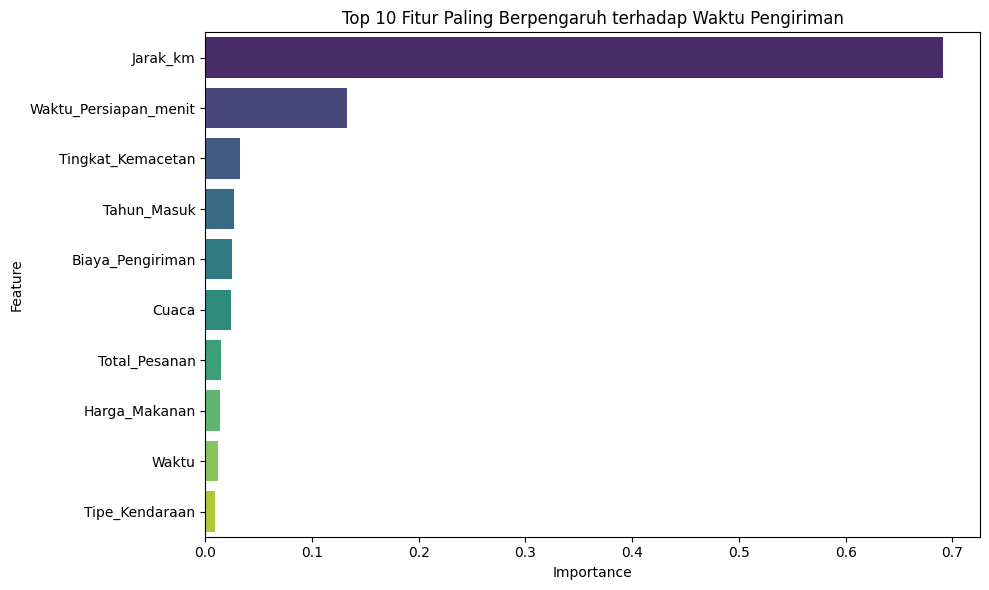

,Feature,Importance
0,Jarak_km,0.691301
5,Waktu_Persiapan_menit,0.132871
2,Tingkat_Kemacetan,0.032692
6,Tahun_Masuk,0.026710
9,Biaya_Pengiriman,0.024649
1,Cuaca,0.024175
7,Total_Pesanan,0.014462
8,Harga_Makanan,0.014248
3,Waktu,0.011534
4,Tipe_Kendaraan,0.008747


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan'])
y = df_processed_train['Waktu_Pengiriman_menit']

# Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil feature importance
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Fitur Paling Berpengaruh terhadap Waktu Pengiriman')
plt.tight_layout()
plt.show()

importance_df  # Menampilkan fitur paling berpengaruh secara numerik juga


berdasarkan analisis menggunakan random forest regressor terdapat 3 fitur paling berpengaruh dalam memprediksi waktu pengiriman yaitu jarak km, waktu persiapan, tingkat kemacetan

# **No. 2**
Buat dan bandingkan minimal tiga model regresi untuk memprediksi waktu pengiriman pesanan. Jelaskan alasan pemilihan model serta proses trainingnya.

In [ ]:


from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

# Gunakan hanya satu fitur: Jarak_km
x_slr = df_processed_train[['Jarak_km']]  # Format 2D array
y_slr = df_processed_train['Waktu_Pengiriman_menit']

x_train_slr, x_test_slr, y_train_slr, y_test_slr = train_test_split(x_slr, y_slr, test_size=0.3, random_state=42)

# Train model
slr = LinearRegression()
slr.fit(x_train_slr, y_train_slr)

# Prediksi
y_pred_slr = slr.predict(x_test_slr)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_slr, y_pred_slr)

mse = mean_squared_error(y_test_slr, y_pred_slr)

rsquared = r2_score(y_test_slr, y_pred_slr)

rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", rsquared)
print("RMSE:", rmse)

MAE: 10.517170098200891
MSE: 204.05421100540732
R-squared: 0.5806243327086532
RMSE: 14.284754495804515


In [ ]:
from xgboost import XGBRegressor

x_xgb = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan'])
y_xgb = df_processed_train['Waktu_Pengiriman_menit']

x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_xgb, y_xgb, test_size=0.3, random_state=42)

# Train model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train_xgb, y_train_xgb)

# Prediksi
y_pred_xgb = xgb.predict(x_test_xgb)

In [ ]:
mae = mean_absolute_error(y_test_xgb, y_pred_xgb)

mse = mean_squared_error(y_test_xgb, y_pred_xgb)

rsquared = r2_score(y_test_xgb, y_pred_xgb)

rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", rsquared)
print("RMSE:", rmse)

MAE: 8.886757441929408
MSE: 183.03834696433452
R-squared: 0.6238164920985694
RMSE: 13.52916652881228


In [ ]:
from sklearn.ensemble import RandomForestRegressor


test = df_processed_test.drop(columns=['ID_Pesanan'])
x_rf = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan'])
y_rf = df_processed_train['Waktu_Pengiriman_menit']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

grid_search.fit(x_train_rf, y_train_rf)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

# Prediksi
y_pred_rf = best_rf.predict(x_test_rf)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


# **No. 3**

Evaluasi performa model menggunakan metrik seperti MAE, MSE, RMSE, atau R² Score. Analisis model mana yang memberikan hasil terbaik dan berikan insight dari hasil evaluasi.

In [ ]:
mae = mean_absolute_error(y_test_rf, y_pred_rf)

mse = mean_squared_error(y_test_rf, y_pred_rf)

rsquared = r2_score(y_test_rf, y_pred_rf)

rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", rsquared)
print("RMSE:", rmse)

MAE: 8.36994270301463
MSE: 161.74308079379276
R-squared: 0.667582883472777
RMSE: 12.71782531700262


1. Random Forest Lebih Robust Terhadap Noise & Data Kecil
Random Forest adalah ensemble dari banyak decision tree → bagus buat dataset dengan ukuran sedang dan fitur campuran (numerik + kategorikal).
Dia bisa mengurangi overfitting dengan averaging hasil banyak tree → ini bikin model lebih stabil.

2. Grid Search = Parameter Tuning yang Tepat Guna
Tanpa tuning, model default kadang underperform.

  - Grid Search mengoptimasi:

    - n_estimators (jumlah pohon)

    - max_depth (kedalaman pohon)

    - min_samples_split, min_samples_leaf, dll

  - Parameter ini sangat penting untuk kontrol kompleksitas vs generalisasi.


3. Karakteristik Dataset Cocok untuk Random Forest
Kalau dataset kamu:

  - Tidak terlalu besar (misal < 10.000 baris)

  - Banyak fitur kategorikal yang sudah diencode

  - Variabel target (waktu_pengiriman_menit) tidak terlalu linear

Random Forest bisa menangkap pola-pola non-linear lebih baik dari model linear atau model boosting yang belum optimal dituning.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

x = df_processed_train.drop(columns=['Waktu_Pengiriman_menit', 'ID_Pesanan'])
y = df_processed_train['Waktu_Pengiriman_menit']
test = df_processed_test.drop(columns=['ID_Pesanan'])

# Fit Random Forest Regressor

rf_test = RandomForestRegressor(random_state=42)
grid_search_test = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

grid_search.fit(x, y)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred_rf_test = best_rf.predict(test)

# Assign predictions to a new column in the DataFrame
df_processed_test['Waktu_Pengiriman_menit'] = y_pred_rf_test
df_processed_test['ID_Pesanan'] = df_processed_test['ID_Pesanan'].astype('int64')

# Save the updated DataFrame
df_hasil = df_processed_test[['ID_Pesanan', 'Waktu_Pengiriman_menit']]
df_processed_test.info()

df_hasil.to_csv('submission.csv', index=False)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID_Pesanan                   300 non-null    int64  
 1   Jarak_km                     300 non-null    float64
 2   Cuaca                        300 non-null    float64
 3   Tingkat_Kemacetan            300 non-null    int64  
 4   Waktu                        300 non-null    int64  
 5   Tipe_Kendaraan               300 non-null    int64  
 6   Waktu_Persiapan_menit        300 non-null    float64
 7   Tahun_Masuk                  300 non-null    float64
 8   Total_Pesanan                300 non-null    float64
 9   Harga_Makanan                300 non-null    float64
 10  Biaya_Pengiriman       

In [ ]:
y_pred_rf_test

array([ 50.20994312,  42.15415516,  41.86435673,  26.63935384,
        73.47211272,  34.03466807,  41.82577952,  80.91986071,
        40.61000874,  28.5815309 ,  57.86937405,  83.20765445,
        35.83413788,  53.63701323,  38.34601913,  55.86047819,
        58.69761064,  29.3401008 ,  22.38769408,  60.56377877,
        60.38755695,  72.72861942,  68.15961671,  97.45046612,
        56.68329432,  67.67583598,  60.59353978,  55.89368754,
        77.09726386,  40.38162558,  81.92164418,  48.48691701,
        44.83910014,  79.66651071,  58.11536941,  83.6101527 ,
        38.60617892,  30.24617806,  32.82724651,  39.58885151,
        40.88188385,  91.47679065,  32.86164492,  30.53513128,
        73.90315389,  46.45325529,  94.8940699 ,  50.03335715,
        46.86710323,  75.47209074,  30.80852305,  50.6841651 ,
        60.33849332,  41.51592539,  61.87411275,  41.52746001,
        44.99528644,  39.69515629,  94.33970167,  83.75945871,
        30.27254918,  72.6237234 ,  73.7803498 , 101.21

In [ ]:
df_hasil

,ID_Pesanan,Waktu_Pengiriman_menit
0,989,50.209943
1,174,42.154155
2,761,41.864357
3,494,26.639354
4,924,73.472113
...,...,...
295,114,75.809910
296,890,60.432840
297,93,73.706147
298,189,49.583687


# **No. 4**

Apakah model klasifikasi bisa digunakan untuk menyelesaikan masalah ini? Jelaskan mengapa regresi lebih sesuai.

# **Masalah yang Sedang Diselesaikan**

Kita ingin memprediksi Waktu_Pengiriman_menit, yang merupakan:

- Nilai kontinu (angka real) seperti 32, 45, 68.5, dll

- Tidak terbatas pada beberapa kelas

- bisa beragam dan tidak diskrit

Ini secara alami adalah masalah regresi.

# **Kenapa Klasifikasi Tidak Tepat**

Model klasifikasi hanya cocok jika target-nya adalah:

- Kategori/kelas tertentu, seperti "cepat", "sedang", "lama"

- Atau angka yang bisa dikelompokkan secara eksplisit, seperti 1, 2, 3 yang berarti level, bukan angka asli

Jika kamu paksa menggunakan klasifikasi, maka:

- Harus mengubah waktu_pengiriman_menit jadi kelas diskrit (misal: <30 = cepat, 30–60 = sedang, >60 = lama)

- Kamu kehilangan detail dan akurasi dari prediksi menit yang spesifik

- Model tidak bisa prediksi angka 42 menit, hanya bisa bilang "sedang"

Jadi hasilnya akan:

- Kurang informatif

- Lebih kasar

- Kurang cocok untuk keperluan operasional/logistik yang butuh waktu aktual
